In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder as OHE
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn import svm
from sklearn import metrics

In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedShuffleSplit

In [ ]:
oj = pd.read_csv(r'/content/drive/MyDrive/OJ.csv',index_col=0)

In [ ]:
print(oj.shape)
print(oj.columns)

(1070, 18)
Index(['Purchase', 'WeekofPurchase', 'StoreID', 'PriceCH', 'PriceMM', 'DiscCH',
       'DiscMM', 'SpecialCH', 'SpecialMM', 'LoyalCH', 'SalePriceMM',
       'SalePriceCH', 'PriceDiff', 'Store7', 'PctDiscMM', 'PctDiscCH',
       'ListPriceDiff', 'STORE'],
      dtype='object')


In [ ]:
oj

,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
1,CH,237,1,1.75,1.99,0.00,0.00,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
2,CH,239,1,1.75,1.99,0.00,0.30,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
3,CH,245,1,1.86,2.09,0.17,0.00,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
4,MM,227,1,1.69,1.69,0.00,0.00,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
5,CH,228,7,1.69,1.69,0.00,0.00,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1066,CH,252,7,1.86,2.09,0.10,0.00,0,0,0.587822,2.09,1.76,0.33,Yes,0.000000,0.053763,0.23,0
1067,CH,256,7,1.86,2.18,0.00,0.00,0,0,0.670258,2.18,1.86,0.32,Yes,0.000000,0.000000,0.32,0
1068,MM,257,7,1.86,2.18,0.00,0.00,0,0,0.736206,2.18,1.86,0.32,Yes,0.000000,0.000000,0.32,0
1069,CH,261,7,1.86,2.13,0.00,0.24,0,0,0.588965,1.89,1.86,0.03,Yes,0.112676,0.000000,0.27,0


In [ ]:
oj.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1070 entries, 1 to 1070
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Purchase        1070 non-null   object 
 1   WeekofPurchase  1070 non-null   int64  
 2   StoreID         1070 non-null   int64  
 3   PriceCH         1070 non-null   float64
 4   PriceMM         1070 non-null   float64
 5   DiscCH          1070 non-null   float64
 6   DiscMM          1070 non-null   float64
 7   SpecialCH       1070 non-null   int64  
 8   SpecialMM       1070 non-null   int64  
 9   LoyalCH         1070 non-null   float64
 10  SalePriceMM     1070 non-null   float64
 11  SalePriceCH     1070 non-null   float64
 12  PriceDiff       1070 non-null   float64
 13  Store7          1070 non-null   object 
 14  PctDiscMM       1070 non-null   float64
 15  PctDiscCH       1070 non-null   float64
 16  ListPriceDiff   1070 non-null   float64
 17  STORE           1070 non-null   i

In [ ]:
train, test = train_test_split(oj, test_size= (len(oj)-800)/len(oj), random_state=1)
print((len(oj)-800)/len(oj))
y_train = train['Purchase'].to_frame(name='Purchase')
train.drop('Purchase', axis=1, inplace=True)

y_test = test['Purchase'].to_frame(name='Purchase')
test.drop('Purchase', axis=1, inplace=True)

0.2523364485981308


In [ ]:
cat = train.select_dtypes(include=['object']).columns
cat2 = test.select_dtypes(include=['object']).columns
#train[[cat]].unique().value_counts()
train[cat].value_counts()

Store7
No        535
Yes       265
dtype: int64

In [ ]:
def one_hot_encode_beta(train, test):
    '''
    This function can one hot encode the training data and the testing data at the same time, since we want to one hot encode 
    the training data and testing data in the same format. But we're just process the testing data here, and only use it in the 
    last question 
    '''
    enc = OHE(handle_unknown='ignore') 
    onehotencoded = train.copy()
    onehotencoded_test = test.copy()
    
    for col in train.columns:
        enc.fit(train[[col]]) # use two square brackets to make it as 2 dimensional
        
        # handling train data
        temp = enc.transform(train[[col]])
        temp = pd.DataFrame(temp.todense(), columns=[(col+"_"+str(i)) for i in train[col].value_counts().index])
        temp = temp.set_index(train.index.values)
        onehotencoded = pd.concat([onehotencoded,temp],axis=1)
        onehotencoded = onehotencoded.drop(col,axis=1)
        
        # handling test data
        temp = enc.transform(test[[col]])
        temp = pd.DataFrame(temp.todense(), columns=[(col+"_"+str(i)) for i in train[col].value_counts().index])
        temp = temp.set_index(test.index.values)
        onehotencoded_test = pd.concat([onehotencoded_test, temp],axis=1)
        onehotencoded_test = onehotencoded_test.drop(col, axis=1)
        
    return onehotencoded, onehotencoded_test

In [ ]:
train_encoded, test_encoded = one_hot_encode_beta(train[cat], test[cat2])

In [ ]:
train_ohe = pd.concat([train_encoded, train], axis=1, join="inner")
train_ohe.drop(['Store7'], axis=1, inplace=True)

In [ ]:
train_ohe

,Store7_No,Store7_Yes,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
953,1.0,0.0,267,2,1.86,2.18,0.0,0.4,0,1,0.003817,1.78,1.86,-0.08,0.183486,0.000000,0.32,2
1039,1.0,0.0,235,1,1.69,1.99,0.0,0.0,0,0,0.400000,1.99,1.69,0.30,0.000000,0.000000,0.30,1
387,1.0,0.0,229,2,1.69,1.69,0.0,0.0,0,0,0.165373,1.69,1.69,0.00,0.000000,0.000000,0.00,2
974,1.0,0.0,243,1,1.86,1.99,0.0,0.8,0,1,0.314957,1.19,1.86,-0.67,0.402010,0.000000,0.13,1
239,0.0,1.0,250,7,1.86,2.09,0.0,0.0,0,0,0.820592,2.09,1.86,0.23,0.000000,0.000000,0.23,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
848,1.0,0.0,275,2,1.96,2.18,0.0,0.8,0,1,0.168709,1.38,1.96,-0.58,0.366972,0.000000,0.22,2
716,1.0,0.0,267,3,1.99,2.09,0.1,0.0,0,0,0.000130,2.09,1.89,0.20,0.000000,0.050251,0.10,3
906,0.0,1.0,231,7,1.69,1.99,0.0,0.0,0,0,0.256000,1.99,1.69,0.30,0.000000,0.000000,0.30,0
236,1.0,0.0,236,3,1.79,2.09,0.0,0.0,0,0,0.649594,2.09,1.79,0.30,0.000000,0.000000,0.30,3


In [ ]:
test_ohe = pd.concat([test_encoded, test], axis=1, join="inner")
test_ohe.drop(['Store7'], axis=1, inplace=True)

In [ ]:
y_train = pd.get_dummies(y_train)
y_train.drop(['Purchase_CH'], axis=1, inplace=True) #CM==1, MM==0

In [ ]:
y_test = pd.get_dummies(y_test)
y_test.drop(['Purchase_CH'], axis=1, inplace=True) #CM==1, MM==0

In [ ]:
y_test

,Purchase_MM
121,0
375,1
91,0
845,1
650,0
...,...
575,1
790,1
330,0
51,1


In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(train_ohe)
X_test = scaler.fit_transform(test_ohe)

In [ ]:
svm_clf = svm.SVC(kernel='linear', C=0.01).fit(train_ohe, y_train)
y_pred_train = svm_clf.predict(train_ohe)
coef_train = svm_clf.coef_ #shouls have 18 variables
print('The training error rate with Linear SVM is:', 1 - svm_clf.score(train_ohe, y_train))
print('The testing error rate with Linear SVM is:', 1 - svm_clf.score(test_ohe, y_test))

The training error rate with Linear SVM is: 0.31000000000000005
The testing error rate with Linear SVM is: 0.3592592592592593


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print('Report learned coefficients:\n', coef_train)

Report learned coefficients:
 [[ 0.00918673 -0.00918673 -0.00354291 -0.07624217  0.02760571 -0.03228162
  -0.03806063  0.13881415 -0.0582911   0.3        -0.96800332 -0.17109577
   0.06566634 -0.23676211  0.06454517 -0.02042715 -0.05988733 -0.01193506]]


In [ ]:
print(np.linspace(-2, 1, 10+1))

[-2.  -1.7 -1.4 -1.1 -0.8 -0.5 -0.2  0.1  0.4  0.7  1. ]


Use cross validation to select an optimal cost (C) and report a CV error plot. Consider values in the range 0.01 to 10. What C is the best using the one-stderr rule?

In [ ]:
bins = 20
exps = np.linspace(-2, 1, bins+1)
c_params = [10**i for i in exps]
parameters = {'C': c_params}

svc = svm.SVC(kernel='linear')
clf = GridSearchCV(svc, parameters)
clf.fit(train_ohe, y_train)

In [ ]:
print(c_params)

[0.01, 0.01412537544622754, 0.0199526231496888, 0.028183829312644536, 0.039810717055349734, 0.05623413251903491, 0.07943282347242814, 0.11220184543019636, 0.15848931924611134, 0.2238721138568339, 0.31622776601683794, 0.44668359215096304, 0.630957344480193, 0.8912509381337455, 1.2589254117941675, 1.7782794100389228, 2.5118864315095797, 3.5481338923357533, 5.01187233627272, 7.07945784384138, 10.0]


In [ ]:
print(clf.best_params_)

{'C': 10.0}


In [ ]:
# linspace run
print(clf.cv_results_['mean_test_score'])
print(clf.cv_results_['params'])

[0.6625  0.72125 0.79    0.7975  0.81375 0.82375 0.82125 0.8225  0.8225
 0.82375 0.825   0.82625 0.8225  0.82875 0.825   0.8275  0.8275  0.82375
 0.8225  0.82625 0.82875]
[{'C': 0.01}, {'C': 0.01412537544622754}, {'C': 0.0199526231496888}, {'C': 0.028183829312644536}, {'C': 0.039810717055349734}, {'C': 0.05623413251903491}, {'C': 0.07943282347242814}, {'C': 0.11220184543019636}, {'C': 0.15848931924611134}, {'C': 0.2238721138568339}, {'C': 0.31622776601683794}, {'C': 0.44668359215096304}, {'C': 0.630957344480193}, {'C': 0.8912509381337455}, {'C': 1.2589254117941675}, {'C': 1.7782794100389228}, {'C': 2.5118864315095797}, {'C': 3.5481338923357533}, {'C': 5.01187233627272}, {'C': 7.07945784384138}, {'C': 10.0}]


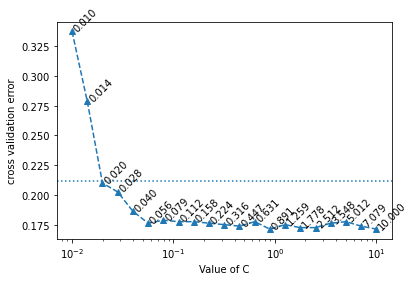

The small C with in one standard error is: 0.028183829312644536


In [ ]:
y = clf.cv_results_['mean_test_score']
x = c_params
y_error = 1-y
cv_min = np.min(y_error)

plt.plot(x, y_error, '^--')
plt.xscale('log')
for i, k in enumerate(x):
   plt.annotate('{:.3f}'.format(k), (x[i], y_error[i]), rotation=45)
plt.axhline(cv_min+np.std(y_error), linestyle='dotted', label='Best + One SE')
plt.xlabel('Value of C')
plt.ylabel('cross validation error')
plt.show()

print('The small C with in one standard error is:', x[3])

In [ ]:
print(clf.best_score_)
good_c = x[3]
print(good_c)

0.8287500000000001
0.028183829312644536


Compute the training and test error rates using this new value for cost.

In [ ]:
svm_clf_10 = svm.SVC(kernel='linear', C=good_c).fit(train_ohe, y_train)
y_pred_train_10 = svm_clf_10.predict(train_ohe)
print('The training error rate for C=0.0028 is:', 1 - svm_clf_10.score(train_ohe, y_train))
print('The testing error rate for C=0.0028 is:', 1 - svm_clf_10.score(test_ohe, y_test))

The training error rate for C=0.0028 is: 0.1825
The testing error rate for C=0.0028 is: 0.18518518518518523


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### f. a support vector classifier with a radial bassis function (RBF) kernel

In [ ]:
rbf_clf = SVC(kernel='rbf',gamma='scale', C=1)
rbf_clf.fit(X, y_train)
print('The training error rate with RBF SVM is:', 1 - rbf_clf.score(X, y_train))
print('The testing error rate with RBF SVM is:', 1 - rbf_clf.score(X_test, y_test))

The training error rate with RBF SVM is: 0.15749999999999997
The testing error rate with RBF SVM is: 0.18888888888888888


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
parameters_gamma = {'gamma': parameters2}
svc = SVC(kernel='rbf', C=1)
clf_cv_gamma = GridSearchCV(svc, parameters_gamma)
clf_cv_gamma.fit(X, y_train)

In [ ]:
print(clf_cv_gamma.best_params_)
print(clf_cv_gamma.cv_results_['mean_test_score'])
print(clf_cv_gamma.cv_results_['params'])
print(1- clf_cv_gamma.cv_results_['mean_test_score'])

{'gamma': 0.01}
[0.82625 0.81375 0.78625 0.77125 0.765   0.76375 0.7575  0.7575  0.75625
 0.755  ]
[{'gamma': 0.01}, {'gamma': 0.1}, {'gamma': 0.5}, {'gamma': 1}, {'gamma': 2}, {'gamma': 2.5}, {'gamma': 3}, {'gamma': 5}, {'gamma': 7}, {'gamma': 10}]
[0.17375 0.18625 0.21375 0.22875 0.235   0.23625 0.2425  0.2425  0.24375
 0.245  ]


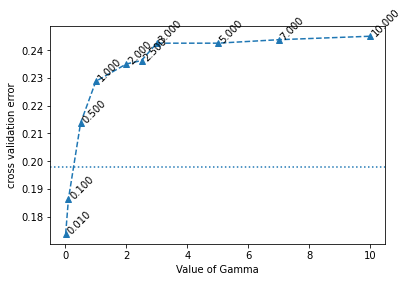

The small C with in one standard error is: 1


In [ ]:
y_gamma = 1 - clf_cv_gamma.cv_results_['mean_test_score']
x_gamma = parameters2
cv_gamma_min = np.min(y_gamma)

plt.plot(x_gamma, y_gamma, '^--')
for i, k in enumerate(x_gamma):
   plt.annotate('{:.3f}'.format(k), (x_gamma[i], y_gamma[i]), rotation=45)
plt.axhline(cv_gamma_min+np.std(y_gamma), linestyle='dotted', label='Best + One SE')
plt.xlabel('Value of Gamma')
plt.ylabel('cross validation error')
plt.show()

print('The small C with in one standard error is:', x_gamma[3])

In [ ]:
parameters2 = [0.01, 0.1, 0.5, 1, 2, 2.5, 3, 5, 7, 10]
score = []

for i in range(len(parameters2)):
  clf_cv1 = SVC(kernel='rbf',gamma=parameters2[i], C=1)
  clf_cv1.fit(X, y_train)
  score.append(1 - clf_cv1.score(X, y_train))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [ ]:
print(1 - np.array(score))

[0.6375  0.76875 0.62    0.62    0.62    0.62    0.62    0.62    0.62
 0.62   ]


In [ ]:
score

[0.16000000000000003,
 0.15000000000000002,
 0.13124999999999998,
 0.11750000000000005,
 0.10499999999999998,
 0.09624999999999995,
 0.09125000000000005,
 0.08499999999999996,
 0.07625000000000004,
 0.0675]

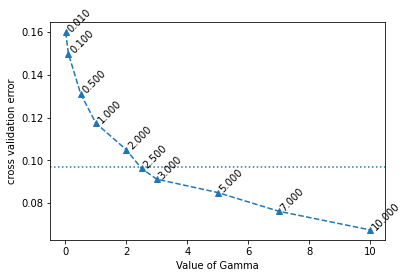

The small C with in one standard error is: 1


In [ ]:
y_gamma = score
x_gamma = parameters2
cv_gamma_min = np.min(y_gamma)

plt.plot(x_gamma, y_gamma, '^--')
for i, k in enumerate(x_gamma):
   plt.annotate('{:.3f}'.format(k), (x_gamma[i], y_gamma[i]), rotation=45)
plt.axhline(cv_gamma_min+np.std(y_gamma), linestyle='dotted', label='Best + One SE')
plt.xlabel('Value of Gamma')
plt.ylabel('cross validation error')
plt.show()

print('The small C with in one standard error is:', x_gamma[3])

### Compute the training and test error rates using this new value for gamma.

In [ ]:
best_gamma = 0.5

In [ ]:
rbf_clf_gamma = SVC(kernel='rbf',gamma=best_gamma, C=1.5).fit(X, y_train)
print('The training error rate with RBF SVM is:', 1 - rbf_clf_gamma.score(X, y_train))
print('The testing error rate with RBF SVM is:', 1 - rbf_clf_gamma.score(X_test, y_test))

The training error rate with RBF SVM is: 0.12624999999999997
The testing error rate with RBF SVM is: 0.20370370370370372


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Notice that when gamma is too big, our data is more likely to overfit.

### h. Repeat parts (b) through (e) using a support vector machine with a polynomial kernel. Set degree=2 and use cross validation again to choose an appropriate gamma.

In [ ]:
 svm_poly = SVC(kernel='poly',degree=2, coef0=1, gamma=0.1, C=1).fit(X, y_train)
 print('The error of training data for poynomial kenel is:', 1 - svm_poly.score(X, y_train))
 print('The error of testing data for poynomial kenel is:', 1 - svm_poly.score(X_test, y_test))

The error of training data for poynomial kenel is: 0.14375000000000004
The error of testing data for poynomial kenel is: 0.1962962962962963


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#parameters_poly = {'gamma':[0.01, 1, 2, 3, 5, 7, 10]}
#clf_poly_cv = GridSearchCV(estimator = SVC(kernel='poly',degree=2, coef0=1, C=1), param_grid =parameters_poly)
#clf_poly_cv.fit(X, y_train)

In [ ]:
parameters_poly = [0.01, 0.05, 0.1, 0.05, 1, 2, 3, 4, 6, 7, 10]
score_poly = []

for i in range(len(parameters_poly)):
  clf_poly_cv = SVC(kernel='poly',degree=2, gamma=parameters_poly[i], C=1)
  clf_poly_cv.fit(X, y_train)
  score_poly.append(1 - clf_poly_cv.score(X, y_train))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [ ]:
#1 - clf_cv.cv_results_['mean_test_score']
print(1-np.array(score_poly))

[0.64875 0.78875 0.79    0.78875 0.81375 0.815   0.81625 0.81875 0.8225
 0.82625 0.825  ]


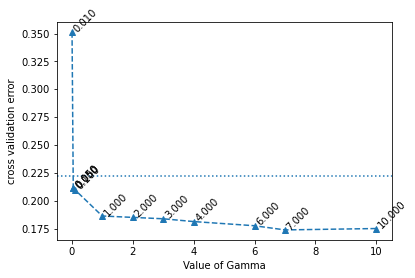

The small C with in one standard error is: 0.1


In [ ]:
y_poly_gamma = score_poly
x_poly_gamma = parameters_poly
cv_gamma_min_poly = np.min(y_poly_gamma)

plt.plot(x_poly_gamma, y_poly_gamma, '^--')
for i, k in enumerate(x_poly_gamma):
   plt.annotate('{:.3f}'.format(k), (x_poly_gamma[i], y_poly_gamma[i]), rotation=45)
plt.axhline(cv_gamma_min_poly+np.std(y_poly_gamma), linestyle='dotted', label='Best + One SE')
plt.xlabel('Value of Gamma')
plt.ylabel('cross validation error')
plt.show()

print('The small C with in one standard error is:', x_poly_gamma[2])

In [ ]:
best_gamma_poly = 0.1

In [ ]:
 svm_poly_gamma = SVC(kernel='poly',degree=3, coef0=1, gamma=best_gamma_poly, C=1).fit(X, y_train)
 print('The error of training data for poynomial kenel is:', 1 - svm_poly_gamma.score(X, y_train))
 print('The error of testing data for poynomial kenel is:', 1 - svm_poly_gamma.score(X_test, y_test))

The error of training data for poynomial kenel is: 0.14125
The error of testing data for poynomial kenel is: 0.18888888888888888


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
